In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

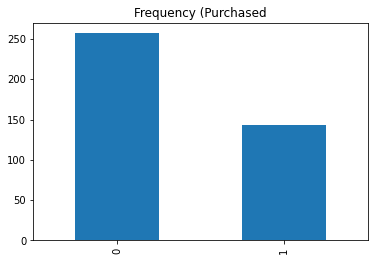

In [12]:
dataset['Purchased'].value_counts().plot(kind='bar', title="Frequency (Purchased");

In [13]:
# Female -> 0
# Male   -> 1
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset["Gender"] = LE.fit_transform(dataset["Gender"])
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [14]:
X = dataset.iloc[:, :-1].values # predictor attributes
y = dataset.iloc[:, -1].values  # target attribute

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
# feature scaling - some values will be bigger than others by nature e.g. salary vs age
# therefore it is necessary to scale our features to ensure that the magnitude of the numbers does not have an impact on the accuracy of the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
from sklearn.svm import SVC
SVM = SVC(kernel="linear")
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
y_pred = SVM.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

|          | Positive | Negative | 
|----------|----------|----------|
| Positive | TP       | FP       |
| Negative | FN       | TN       |

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 8, 24]])

In [29]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac * 100

86.0